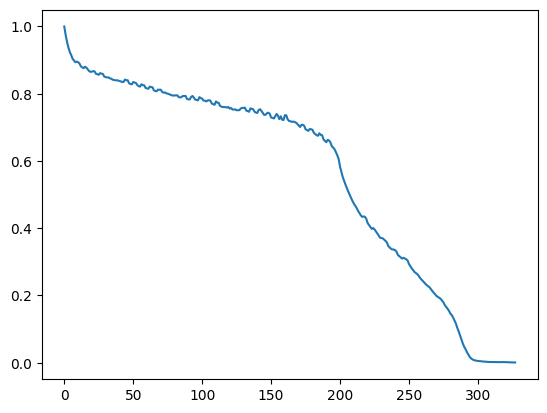

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def sci_to_float(number):
    str_temp = number.partition('E')
    return float(str_temp[0])*pow(10,int(str_temp[-1]))

def read_q(path='D:/batter ai/jupyter/Capacity data/Capacity data/Data_Capacity_45C01.txt'):
    with open(path) as file_in:
        lines = file_in.readlines()
        data = []
        flag_last = '1'
        capacity_last = '0E0'

        for idx, line in enumerate(lines):
            if idx != 0:
                temp_list = list(line.split())
                capacity_last = temp_list[-1]
                status = temp_list[2]
                cycle = temp_list[1]
                data.append([int(sci_to_float(cycle)), int(status), sci_to_float(capacity_last)])
    data = np.array(data)
    Q = []
    for idx in np.unique(data[:, 0]):
        if np.sum((data[:,0]==idx)&(data[:,1]==0)) != 0:
            Q.append([idx, np.max(data[(data[:,0]==idx)&(data[:,1]==0), 2])])
    Q = np.array(Q)
    return Q

data = read_q('D:/batter ai/jupyter/Capacity data/Capacity data/Data_Capacity_25C05.txt')
plt.plot(data[:, 0], data[:, 1]/data[0, 1])